In [2]:
import random
#number of task nodes
TN=2
#number of helper nodes
HN=5
p=[]
for i in range(TN):
    for j in range(HN):
        num=random.randint(120,220)
        p.append(num)

In [3]:
import numpy as np
arr=np.array(p)
arr.shape=(TN,HN)
#print(arr)
p=arr.tolist()

In [4]:
print(p)

[[174, 134, 215, 196, 207], [195, 184, 204, 131, 133]]


In [5]:
import math
SE = [[0]*TN]*HN
SE_NEW=[]
B=200
N=150
#print(SE)
for l in range(HN):
    for i in range(TN):
        P=min((p[i][l]),200)
        SE[l][i]=B*(math.log2(1+(P/(B*N))))
        value=SE[l][i]
        #print(SE[l][i])
        SE_NEW.append(value)

In [6]:
print(SE_NEW)

[1.6686917058669937, 1.86943445185052, 1.2859377753916579, 1.7643009079007985, 1.9172097658395866, 1.9172097658395866, 1.8789901475072943, 1.2572107522356535, 1.9172097658395866, 1.276362418788401]


In [7]:
import numpy as np
SE_UP=np.array(SE_NEW)
#print(SE_UP)
SE_UP.shape=(HN,TN)
print(SE_UP)

[[1.66869171 1.86943445]
 [1.28593778 1.76430091]
 [1.91720977 1.91720977]
 [1.87899015 1.25721075]
 [1.91720977 1.27636242]]


In [8]:
SE_UP = SE_UP.tolist()

In [9]:
PL_HN=[]
for i in range(HN):
    #print(SE_UP[i])
    PLHN=SE_UP[i].index(max(SE_UP[i]))
    #print(PLHN)
    PL_HN.append(PLHN)

In [10]:
print(PL_HN)

[1, 1, 0, 0, 0]


In [11]:
C=[]
for k in range(HN):
    num4=random.randint(100,250)
    C.append(num4)
print(p[0])
print(C)
e= []
for j in range(TN):
    for i in range(HN):
        temp5=((1/C[i])+(1/SE_UP[i][j]))
        R=1/temp5
        temp6=((150/C[i])+(p[j][i]/SE_UP[i][j]))
        Q=(temp6/temp5)
        new=(R/Q)*100
        if new>1:
            new=new-1
        print(new)
        e.append(new)
arr=np.array(e)
arr.shape=(TN,HN)
eta=arr.tolist()      

[174, 134, 215, 196, 207]
[130, 171, 105, 113, 196]
0.948522258725731
0.9516440907932034
0.8805087287383841
0.9466220267108527
0.9196695135695021
0.9481956384619908
0.9508614501378951
0.9273581478382676
0.9476306014369903
0.9526741516638191


In [12]:
print(eta)

[[0.948522258725731, 0.9516440907932034, 0.8805087287383841, 0.9466220267108527, 0.9196695135695021], [0.9481956384619908, 0.9508614501378951, 0.9273581478382676, 0.9476306014369903, 0.9526741516638191]]


In [13]:
EE=[[0]*TN]*HN
for i in range(TN):
    lst=eta[i]
    EE[i]= {i: lst[i] for i in range(0, len(lst))}
    print(EE[i])

{0: 0.948522258725731, 1: 0.9516440907932034, 2: 0.8805087287383841, 3: 0.9466220267108527, 4: 0.9196695135695021}
{0: 0.9481956384619908, 1: 0.9508614501378951, 2: 0.9273581478382676, 3: 0.9476306014369903, 4: 0.9526741516638191}


In [14]:
PL_t0= []
PL_T0=[]
PL_EE=[]
for i in range(TN):
    PL_t0= sorted(EE[i].items(), key=lambda x:x[1], reverse=True)
    PL_t0= dict(PL_t0)
    print(PL_t0)
    PL_T0=list(PL_t0.keys())
    print(PL_T0)
    PL_EE.append(PL_T0)
    

{1: 0.9516440907932034, 0: 0.948522258725731, 3: 0.9466220267108527, 4: 0.9196695135695021, 2: 0.8805087287383841}
[1, 0, 3, 4, 2]
{4: 0.9526741516638191, 1: 0.9508614501378951, 0: 0.9481956384619908, 3: 0.9476306014369903, 2: 0.9273581478382676}
[4, 1, 0, 3, 2]


In [15]:
print(PL_EE)

[[1, 0, 3, 4, 2], [4, 1, 0, 3, 2]]


In [16]:
j=0
assigned=0
for i in range(HN):
    if assigned<2:
        val=PL_EE[0][i]
        if (PL_HN[int(val)] == 0):
            assigned+=1
            print('Helper Node ' +str(val)+ " assigned to task node 0")
j=1
assigned=0
for i in range(HN):
    if assigned<2:
        val=PL_EE[j][i]
        if (PL_HN[int(val)] == 1):
            assigned+=1
            print('Helper Node ' +str(val)+ " assigned to task node 1")  


Helper Node 3 assigned to task node 0
Helper Node 4 assigned to task node 0
Helper Node 1 assigned to task node 1
Helper Node 0 assigned to task node 1


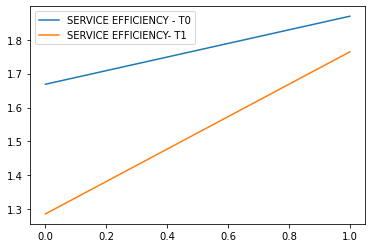

In [17]:
import matplotlib.pyplot as plt
plt.plot(SE_UP[0],label='SERVICE EFFICIENCY - T0')
plt.plot(SE_UP[1],label='SERVICE EFFICIENCY- T1')
#plt.plot(eta,label='test')
plt.legend()
plt.show()

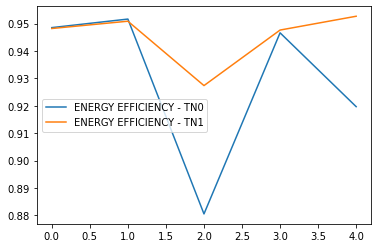

In [24]:
import matplotlib.pyplot as plt
plt.plot(eta[0],label='ENERGY EFFICIENCY - TN0')
plt.plot(eta[1],label='ENERGY EFFICIENCY - TN1')
plt.legend()
plt.show()